#### Group 9 - Advanced Simulation
## Assignment 2

***

In [7]:
#import data manipulation and visualization libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Data sourcing and preparation

We import the data and prepare it to display the results of the simulation.

In [8]:
#Read first scenario for data check
results_df=pd.read_csv('../model/output/scenario'+str(0)+'.csv')
results_df=results_df.drop(columns="veh_driving_time")
results_df = results_df.rename(columns={"Iter":"Iteration"})
value_vars=[]
#loop through all scenarios
for n in np.arange(9):
    #read all scenarios
    scenario_df=pd.read_csv('../model/output/scenario'+str(n)+'.csv')
    scenario_df = scenario_df.drop(columns="Iter")
    #driving time in hours
    scenario_df["veh_driving_time"]=round(scenario_df["veh_driving_time"]/60,2)
    value_vars.append(str(n))
    scenario_df = scenario_df.rename(columns={'veh_driving_time':(str(n))})

    results_df=pd.concat([results_df,scenario_df],axis=1)

results_df.head()

,Iteration,0,1,2,3,4,5,6,7,8
0,1,4.87,4.87,4.87,4.87,4.87,5.77,6.45,8.05,14.07
1,1,4.87,4.87,4.87,5.13,5.18,6.20,6.82,10.02,15.85
2,1,4.87,4.87,4.87,4.87,5.27,5.92,7.92,8.03,14.37
3,1,4.87,4.87,4.87,5.10,5.13,6.23,9.27,10.90,16.98
4,1,4.87,4.87,4.87,6.00,4.87,7.10,9.32,10.22,16.35


In [9]:
# Melt the data into a long format so that it can be plotted
results_df_tidy=pd.melt(results_df,id_vars="Iteration",value_vars=value_vars,var_name="Scenario",value_name="Driving time")
results_df_tidy.head(3)

,Iteration,Scenario,Driving time
0,1,0,4.87
1,1,0,4.87
2,1,0,4.87


## Driving times assessment

We display the driving time in two boxplots, one with outliers and one without. The boxplots are shown below.

<AxesSubplot:xlabel='Scenario', ylabel='Driving time'>

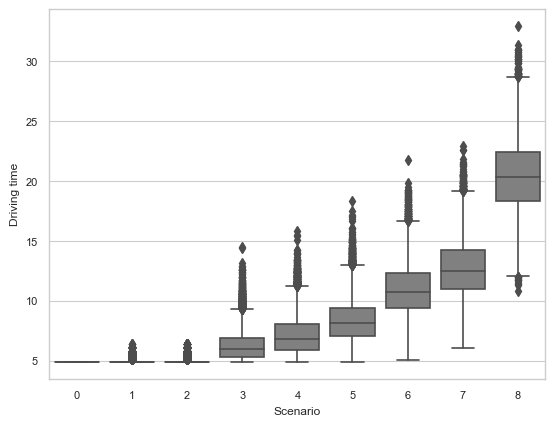

In [10]:
sns.boxplot(data=results_df_tidy, x="Scenario", y="Driving time",color="gray")

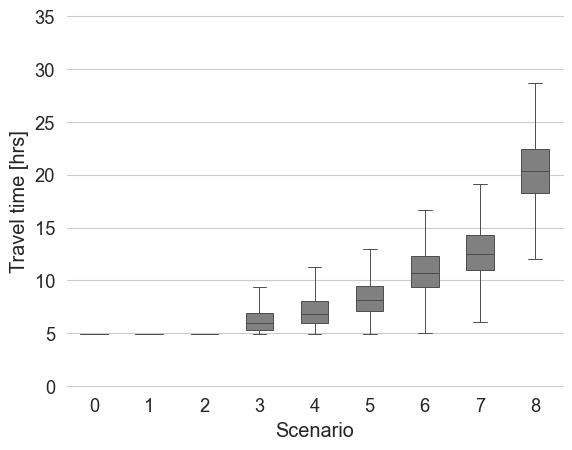

In [13]:
#Boxplot without outliers
#Set up style
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.5)                                                  
color = sns.color_palette("Set2", 6)

# Create a box plot for my data                                                      
splot = sns.boxplot(data=results_df_tidy, x="Scenario", y="Driving time", color="grey",                              
        width=0.5, linewidth = 0.7, showfliers = False)

# Labels and clean up on the plot                                                                                                                                                                                                                                                                                              
splot.set_ylabel('Travel time [hrs]')     
splot.set_xlabel("Scenario")                                                             

# Remove the top and right line in graph                                                                   
splot.yaxis.grid(True, clip_on=False)
splot.set_ylim(0,35)                                                
sns.despine(left=True, bottom=True)       
#Save figure
plt.savefig('../report/figures/boxplot.png', dpi=300, bbox_inches='tight')                                            


## Stochasticity assessment

/Users/alex/opt/anaconda3/envs/gds/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


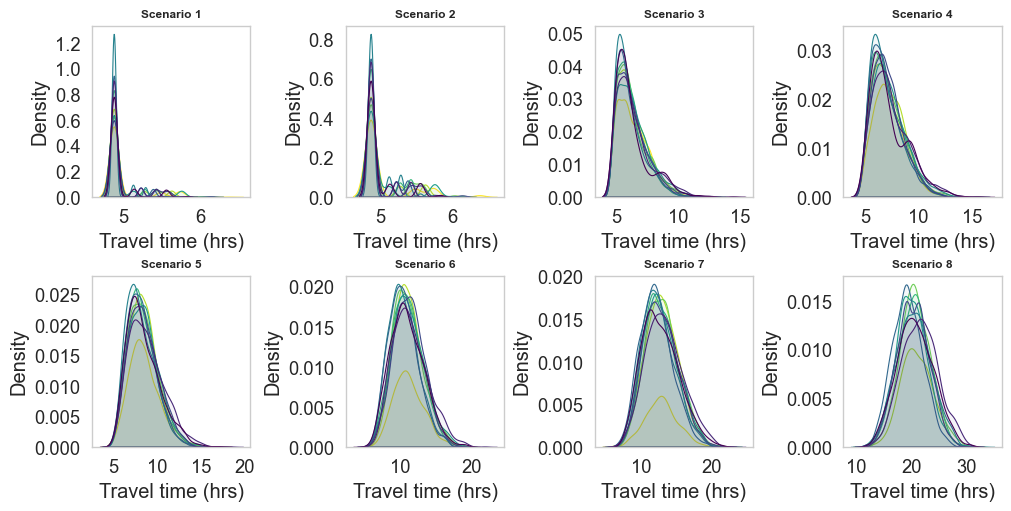

In [12]:
# Set up the figure size
f, ax = plt.subplots(2,4, sharex=False, figsize=(10,5),layout='constrained')
# Loop counter 
m=0
ax=ax.ravel()
sns.set_context("paper", font_scale=0.9)  
# Loop through the scenarios
for n in value_vars[1:]:
    # Plot the data
    sns.kdeplot(data=results_df,x=n, hue="Iteration",palette="viridis",fill=True, alpha=0.05, ax=ax[m]).set_title(
        'Scenario ' + str(n), weight='bold')
    #Set Style
    ax[m].grid(False)
    ax[m].set(xlabel='Travel time (hrs)', ylabel='Density')
    ax[m].legend([],[], frameon=False)
    m+=1
#Save the plot
f.savefig('../report/figures/kdeplot.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()